# 22 Logistic Regression

Logistic regression (aka logit regression or logit) is a regression model with the dependent variable that is categorical.

Example: How does the number of hours of study effects the probability of passing an exam?

[Wikipedia: Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression)  
[Cookbook for R - Logistic regression by Winston Chang](http://www.cookbook-r.com/Statistical_analysis/Logistic_regression)  

hours,pass
0.50,0
0.75,0
1.00,0
1.25,0
1.50,0
1.75,0
1.75,1
2.00,0
2.25,1
2.50,0



Call:  glm(formula = pass ~ hours, family = binomial(link = "logit"), 
    data = df)

Coefficients:
(Intercept)        hours  
     -4.078        1.505  

Degrees of Freedom: 19 Total (i.e. Null);  18 Residual
Null Deviance:	    27.73 
Residual Deviance: 16.06 	AIC: 20.06


Call:
glm(formula = pass ~ hours, family = binomial(link = "logit"), 
    data = df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.70557  -0.57357  -0.04654   0.45470   1.82008  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -4.0777     1.7610  -2.316   0.0206 *
hours         1.5046     0.6287   2.393   0.0167 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 27.726  on 19  degrees of freedom
Residual deviance: 16.060  on 18  degrees of freedom
AIC: 20.06

Number of Fisher Scoring iterations: 5


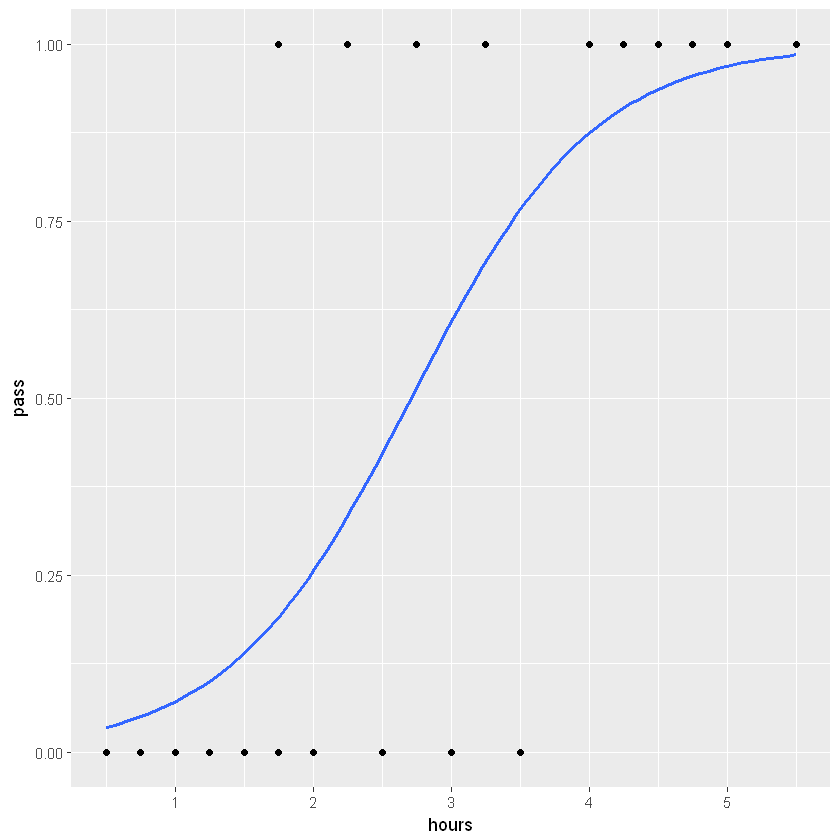

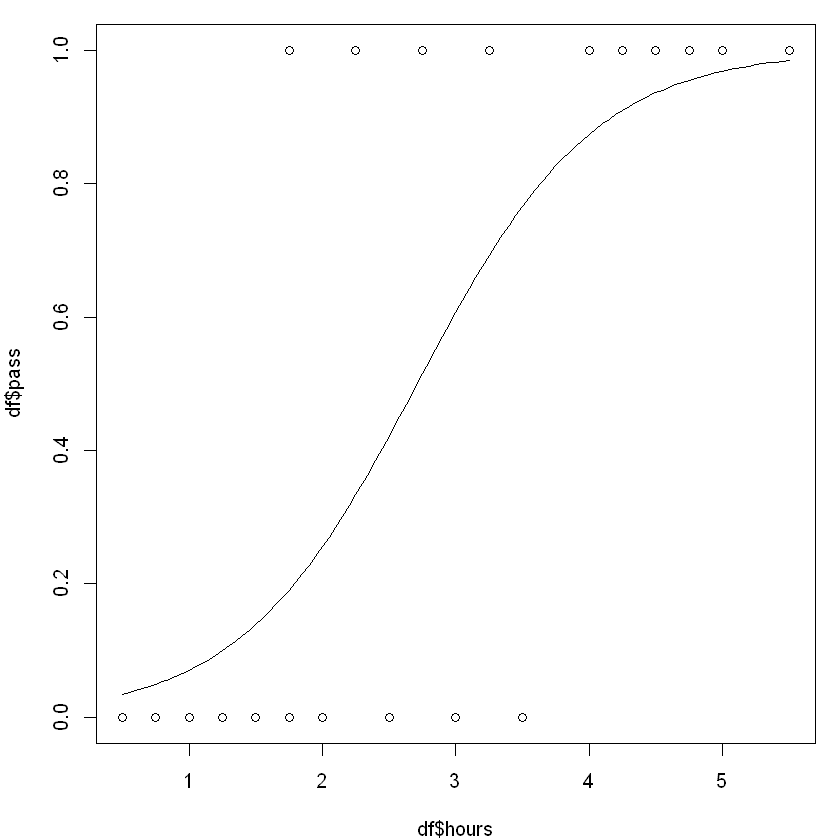

In [16]:
# Continuous predictor and dichotomous outcome
# How does the number of hours of study effects the probability of passing an exam?

hours <- c(0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50)
pass <- c(0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1)
df <- data.frame(hours, pass)
df
logr_lm <- glm(pass ~ hours, data=df, family=binomial(link="logit"))
logr_lm
summary(logr_lm)

library(ggplot2)
ggplot(df, aes(x=hours, y=pass)) + geom_point() + 
  stat_smooth(method="glm", method.args=list(family="binomial"), se=FALSE)

par(mar = c(4, 4, 1, 1)) # Reduce some of the margins so that the plot fits better
plot(df$hours, df$pass)
curve(predict(logr_lm, data.frame(hours=x), type="response"), add=TRUE) 


## The mtcars Dataset
-  **mpg** miles per gallon (continuous predictor)
-  **am**  0 automatic, 1 manual (categorical dichotomous predictor)
-  **vs**  0 V engine, 1 straight engine (categorical dichotomous outcome)

From [Cookbook for R - Logistic regression by Winston Chang](http://www.cookbook-r.com/Statistical_analysis/Logistic_regression)

In [5]:
data(mtcars)
dat <- subset(mtcars, select=c(mpg, am, vs))
dat

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


,mpg,am,vs
Mazda RX4,21.0,1,0
Mazda RX4 Wag,21.0,1,0
Datsun 710,22.8,1,1
Hornet 4 Drive,21.4,0,1
Hornet Sportabout,18.7,0,0
Valiant,18.1,0,1
Duster 360,14.3,0,0
Merc 240D,24.4,0,1
Merc 230,22.8,0,1
Merc 280,19.2,0,1


## Continuous predictor and dichotomous outcome

In [6]:
# mpg is a continuous predictor and vs is a dichotomous outcome
logr_vm <- glm(vs ~ mpg, data=dat, family=binomial(link="logit"))
logr_vm
summary(logr_vm)


Call:  glm(formula = vs ~ mpg, family = binomial(link = "logit"), data = dat)

Coefficients:
(Intercept)          mpg  
    -8.8331       0.4304  

Degrees of Freedom: 31 Total (i.e. Null);  30 Residual
Null Deviance:	    43.86 
Residual Deviance: 25.53 	AIC: 29.53


Call:
glm(formula = vs ~ mpg, family = binomial(link = "logit"), data = dat)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2127  -0.5121  -0.2276   0.6402   1.6980  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -8.8331     3.1623  -2.793  0.00522 **
mpg           0.4304     0.1584   2.717  0.00659 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.860  on 31  degrees of freedom
Residual deviance: 25.533  on 30  degrees of freedom
AIC: 29.533

Number of Fisher Scoring iterations: 6


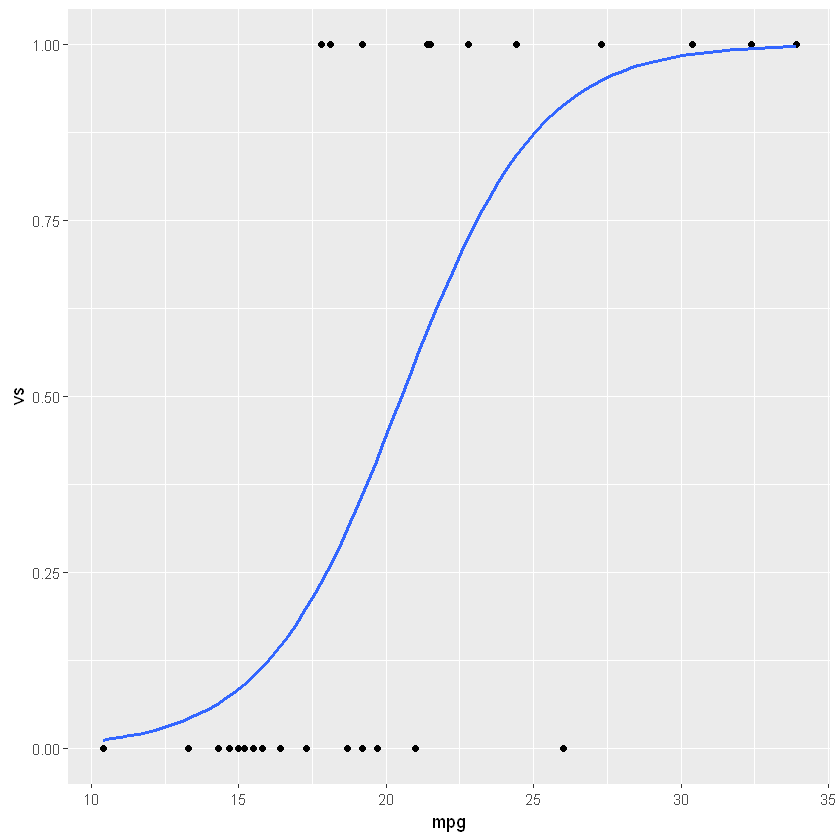

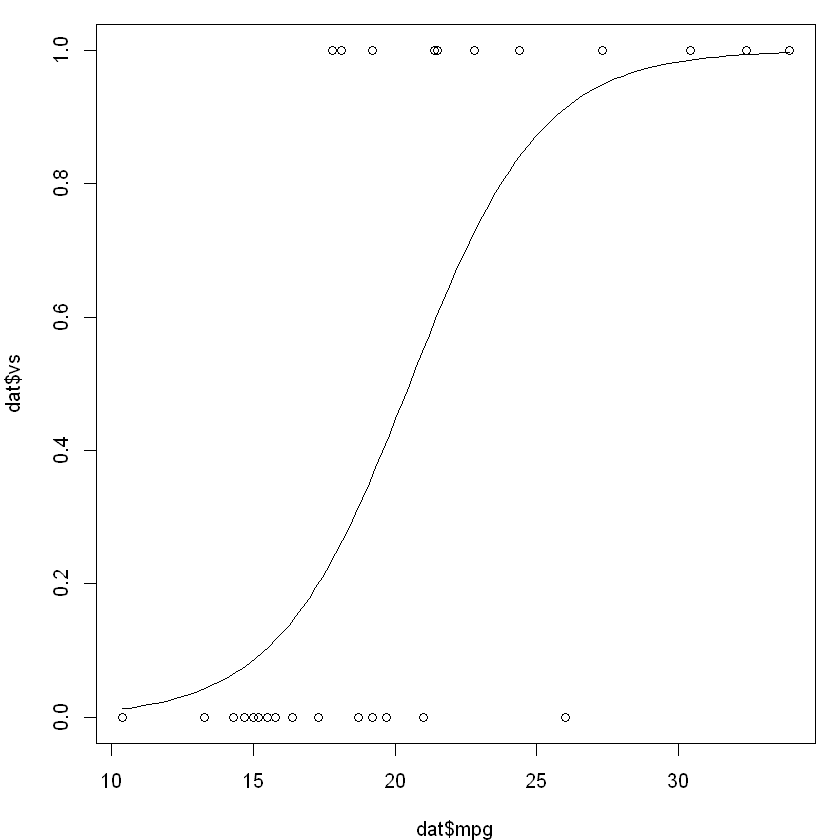

In [8]:
library(ggplot2)
ggplot(dat, aes(x=mpg, y=vs)) + geom_point() + 
  stat_smooth(method="glm", method.args=list(family="binomial"), se=FALSE)

par(mar = c(4, 4, 1, 1)) # Reduce some of the margins so that the plot fits better
plot(dat$mpg, dat$vs)
curve(predict(logr_vm, data.frame(mpg=x), type="response"), add=TRUE) 

## Dichotomous predictor and dichotomous outcome

In [9]:
# am is a dichotomous predictor and vs is a dichotomous outcome
logr_va <- glm(vs ~ am, data=dat, family=binomial(link="logit"))
logr_va
summary(logr_va)


Call:  glm(formula = vs ~ am, family = binomial(link = "logit"), data = dat)

Coefficients:
(Intercept)           am  
    -0.5390       0.6931  

Degrees of Freedom: 31 Total (i.e. Null);  30 Residual
Null Deviance:	    43.86 
Residual Deviance: 42.95 	AIC: 46.95


Call:
glm(formula = vs ~ am, family = binomial(link = "logit"), data = dat)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2435  -0.9587  -0.9587   1.1127   1.4132  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  -0.5390     0.4756  -1.133    0.257
am            0.6931     0.7319   0.947    0.344

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.860  on 31  degrees of freedom
Residual deviance: 42.953  on 30  degrees of freedom
AIC: 46.953

Number of Fisher Scoring iterations: 4


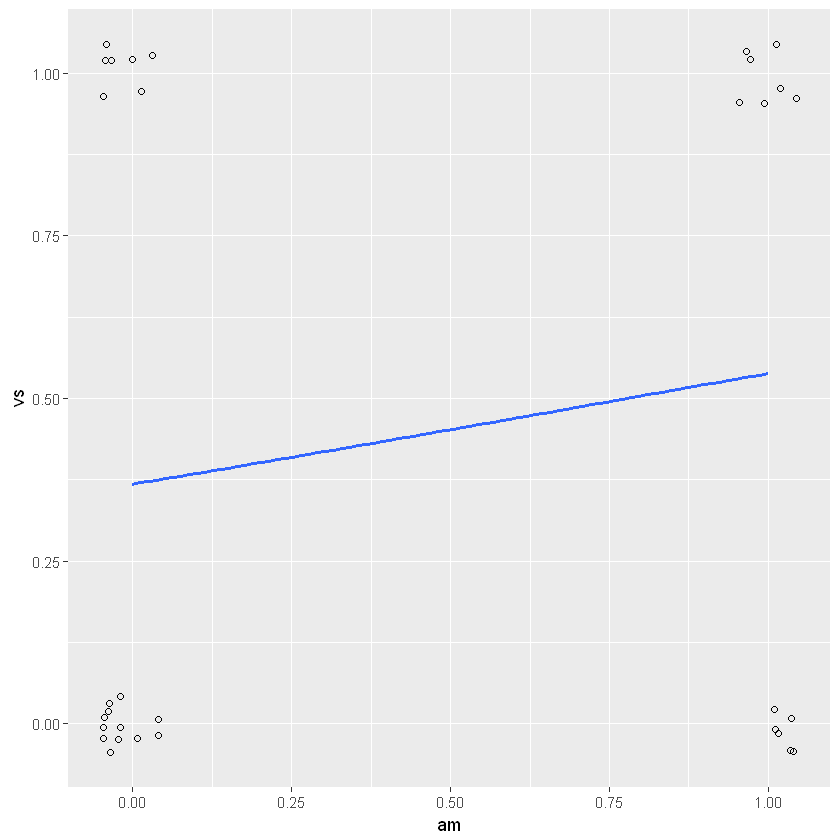

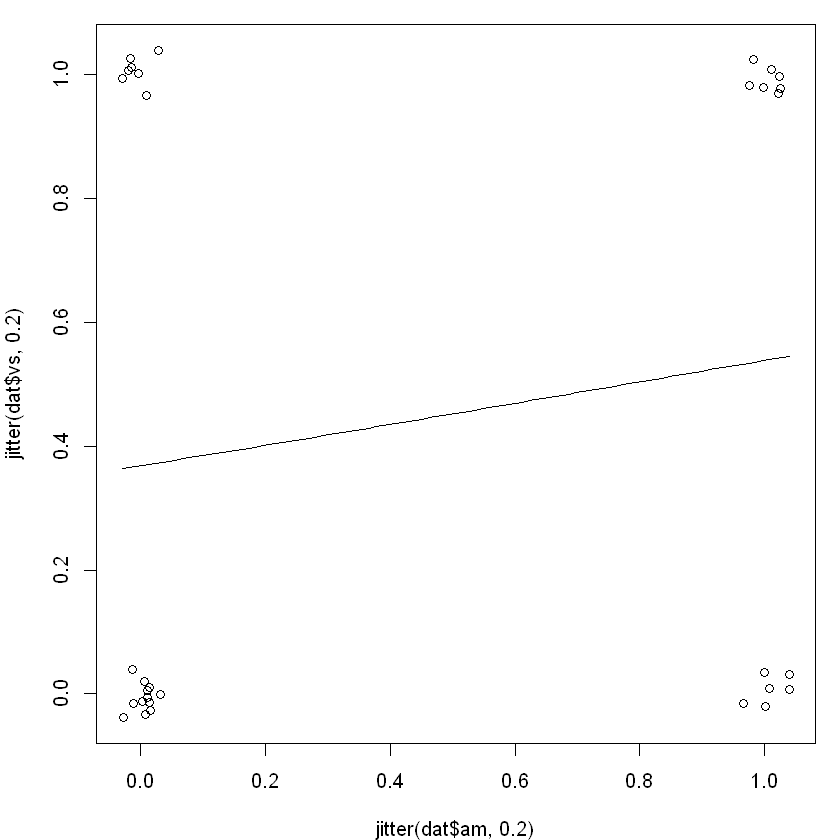

In [10]:
library(ggplot2)
ggplot(dat, aes(x=am, y=vs)) + 
  geom_point(shape=1, position=position_jitter(width=.05,height=.05)) + 
  stat_smooth(method="glm", method.args=list(family="binomial"), se=FALSE)


par(mar = c(4, 4, 1, 1)) # Reduce some of the margins so that the plot fits better
plot(jitter(dat$am, .2), jitter(dat$vs, .2))
curve(predict(logr_va, data.frame(am=x), type="response"), add=TRUE) 